In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np
import os

In [151]:
def norm_w_mask(x,mask, threshold):
    x_out = np.zeros_like(x, dtype=np.float64)
    mask= mask.astype(bool)
    for ii in range(x.shape[0]):
        # if np.nan_to_num(x[ii])
        k=np.median(x[ii][mask[ii]])
        mu = np.std(x[ii][mask[ii]])
        this_mask = (np.abs(x[ii] - k)<mu*threshold)*mask[ii]

        shot_mean = x[ii][this_mask].mean()
#         y = (x[ii]/shot_mean)*this_mask
#         shot_mean = y[this_mask].mean()
#         x_out[ii] = (y-shot_mean)* this_mask
        x_out[ii] = (x[ii]-shot_mean)* this_mask
        
    return x_out

def diff_all_shots(images,mask,threshold):
    images = norm_all_shots(images, mask, threshold)
    diffs = images - images.mean(0)[None,:]
    
    return diffs, images

def norm_all_shots(images,mask, threshold):
    norms = np.zeros_like(images, dtype=np.float64)
    for ii in range(norms.shape[0]):
        norms[ii]=norm_w_mask(images[ii],mask, threshold)
    return norms

In [152]:
file_dir = '/reg/d/psdm/cxi/cxilr6716/scratch/combined_tables/gai/'
run=107
f=h5py.File(os.path.join(file_dir,'run%d.tbl'%run), 'r')
print f.keys()
pi = f['polar_imgs'][:300]
rp = f['radial_profs'][:300]
f.close()

cali_file_dir = '/reg/d/psdm/cxi/cxilr6716/scratch/combined_tables/cali_gai/'
run=111
f=h5py.File(os.path.join(cali_file_dir,'run%d.tbl'%run), 'r')
print f.keys()
cali_pi = f['polar_imgs'][:300]
pmask = f['polar_mask_binned'].value
pmask=(pmask==pmask.max())
f.close()

[u'ebeam', u'event_time', u'evr', u'fiducials', u'gas_detector', u'phase_cav', u'polar_imgs', u'polar_mask', u'polar_mask_binned', u'polar_params', u'radial_profs']
[u'ebeam', u'event_time', u'evr', u'fiducials', u'gas_detector', u'phase_cav', u'polar_imgs', u'polar_mask', u'polar_mask_binned', u'polar_params', u'radial_profs']


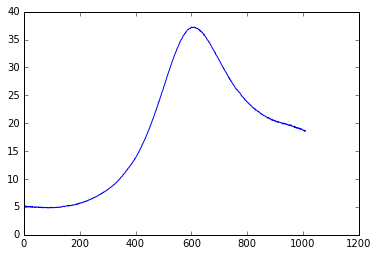

In [153]:
plt.plot(rp.mean(0))

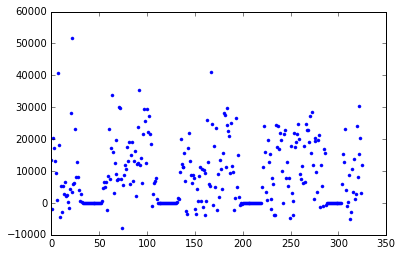

In [154]:
qidx = 0
plt.plot(pi[0,qidx],'.')
# plt.plot(pi.mean(0)[qidx])
# plt.ylim(2.5e4,3.3e4)

In [155]:
pi.dtype

dtype('float32')

In [156]:
diff, norm_pi = diff_all_shots(pi.astype(np.float64),pmask,2.5)
cali_diff, norm_cali_pi=diff_all_shots(cali_pi.astype(np.float64),pmask,2.5)


(-2e-12, 2e-12)

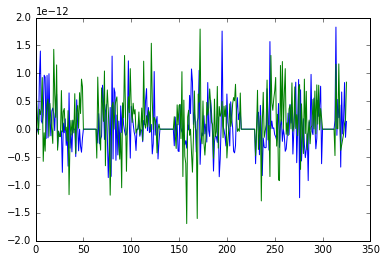

In [157]:
qidx = 5
plt.plot(diff.mean(0)[qidx])
plt.plot(cali_diff.mean(0)[qidx])
plt.ylim()

In [158]:
np.abs(diff.mean(0)).shape
# dd.shape

(50, 326)

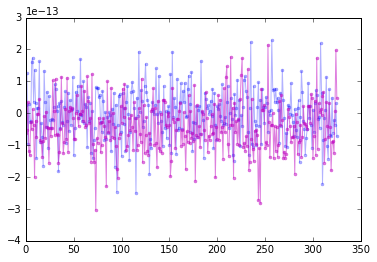

In [159]:
qrange = range(0,30)

dd=pmask[qrange].sum(0)
dd[dd==0]=1
mean_diff =diff.mean(0)[qrange].sum(0)/dd
cali_mean_diff = cali_diff.mean(0)[qrange].sum(0)/dd
plt.plot(mean_diff,'.-',alpha=0.3, c='b')
plt.plot(cali_mean_diff-3e-17, '.-',alpha=0.5, c='m')
# plt.ylim(-0.01,0.01)

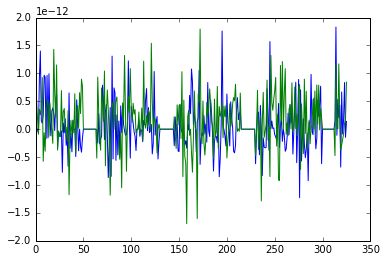

In [160]:
qdix=5
plt.plot(diff.mean(0)[qidx])
plt.plot(cali_diff.mean(0)[qidx]-1e-16)

1.06338617624e-13 1.33654239273e-13
4.58101062795e-13 5.02386231047e-13


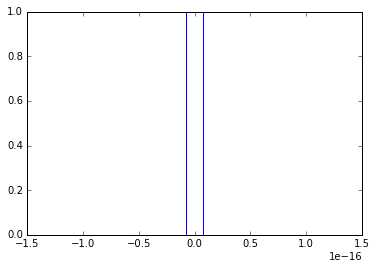

In [161]:
bins= np.linspace(-14e-17,14e-17,20)
x = mean_diff[mean_diff!=0]
qidx = 3
x = diff.mean(0)[qidx][pmask[qidx]]
# x=x[x!=0]
hist1=np.histogram(x,bins=bins)
y = cali_diff.mean(0)[qidx][pmask[qidx]]
# y = y[y!=0]
# y =cali_mean_diff[cali_mean_diff!=0]
hist2=np.histogram(y,bins=bins)

plt.step(bins[1:],hist1[0], color='b' )
plt.step(bins[1:],hist2[0], color='m' )
print x.mean(), y.mean()
print x.std(), y.std()
# print mean_diff.mean(), cali_mean_diff.mean()
# print mean_diff.std(), cali_mean_diff.std()

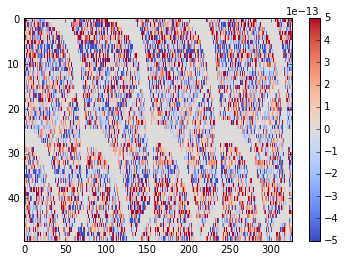

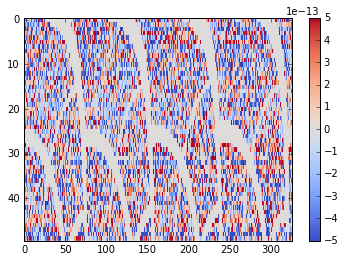

In [165]:
x=-5e-13
y=5e-13
plt.imshow(diff.mean(0)*pmask, aspect='auto',
           vmin=x,vmax=y, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.figure()
plt.imshow(cali_diff.mean(0)*pmask, aspect='auto'
          ,vmin=x,vmax=y, cmap='coolwarm', interpolation='none')
plt.colorbar()

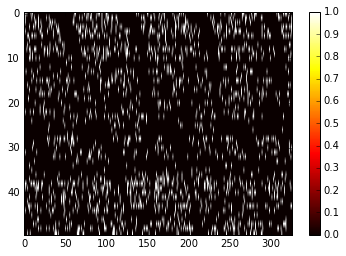

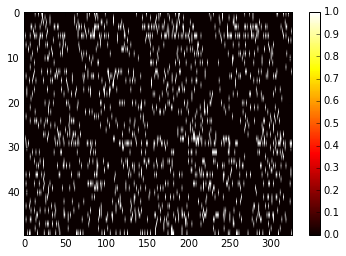

In [168]:
y=4e-13
plt.imshow(diff.mean(0)>y, aspect='auto',
           cmap='hot')
plt.colorbar()
plt.figure()
plt.imshow(cali_diff.mean(0)>y, aspect='auto'
          ,cmap='hot', vmin=0, vmax=1)
plt.colorbar()


(-600.0, 800.0)

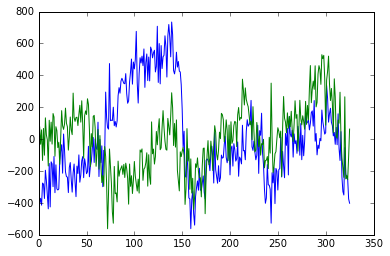

In [169]:
qidx = 16
plt.plot(norm_pi.mean(0).sum(0)/ pmask.sum(0))
plt.plot(norm_cali_pi.mean(0).sum(0)/ pmask.sum(0))
plt.ylim()

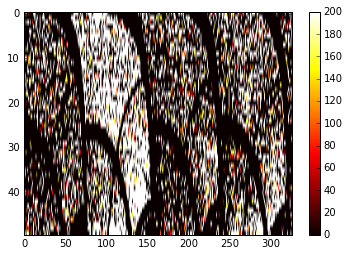

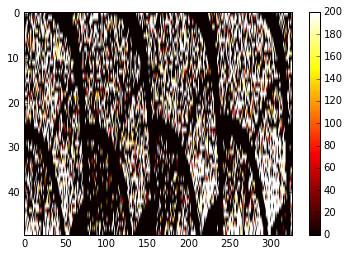

In [170]:
x=0
y=200
plt.imshow(norm_pi.mean(0)*pmask, aspect='auto',
           vmin=x,vmax=y, cmap='hot')
plt.colorbar()
plt.figure()
plt.imshow(norm_cali_pi.mean(0), aspect='auto'
          ,vmin=x,vmax=y, cmap='hot')
plt.colorbar()

(0.85, 1.2)

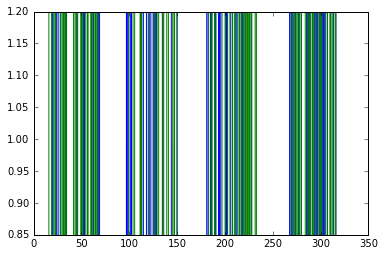

In [363]:
qidx=26
plt.plot(norm_pi.mean(0)[qidx])
plt.plot(norm_cali_pi.mean(0)[qidx])
plt.ylim(0.85,1.2)

In [364]:
# plt.plot(range(50),pmask.sum(-1))
print pmask.sum(-1)[range(14,20)]

[265 259 242 257 264 268]


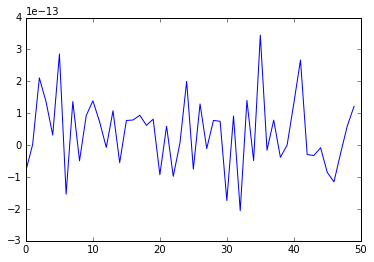

In [365]:
plt.plot(norm_cali_pi.mean(0).sum(-1)/pmask.sum(-1))

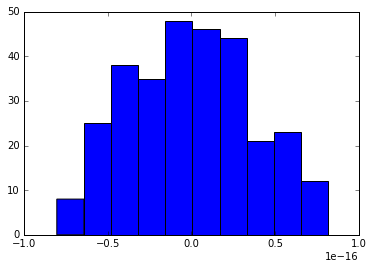

In [123]:

x = norm_cali_pi.mean(-1)
_=plt.hist(x[:,4])

In [116]:
x.shape

(300, 50)

In [150]:

norm_pi.mean(-1).mean()

-5.9292947738656851e-18